In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

from pandas import Series,DataFrame
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

%matplotlib inline

In [5]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [6]:
end = datetime.now()

start = datetime(end.year -1, end.month, end.day)


In [7]:
#creates each tech_list elements as a single data frame 
for stock in tech_list:
    globals()[stock] =DataReader(stock,'yahoo',start,end)

In [8]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,119.836733,120.919920,118.543745,119.717968,5.201205e+07,118.815421
std,8.402889,8.175766,8.613177,8.397580,2.131837e+07,7.977439
min,94.870003,97.709999,92.000000,96.449997,1.302370e+07,96.449997
25%,113.314999,114.445000,112.049999,113.424999,3.734580e+07,112.986358
50%,120.800003,121.809998,119.449997,120.529999,4.709970e+07,120.016268
75%,127.165001,127.934998,125.985000,126.915001,6.154975e+07,125.492359
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.380384


In [10]:
AAPL.count()

Open         253
High         253
Low          253
Close        253
Volume       253
Adj Close    253
dtype: int64

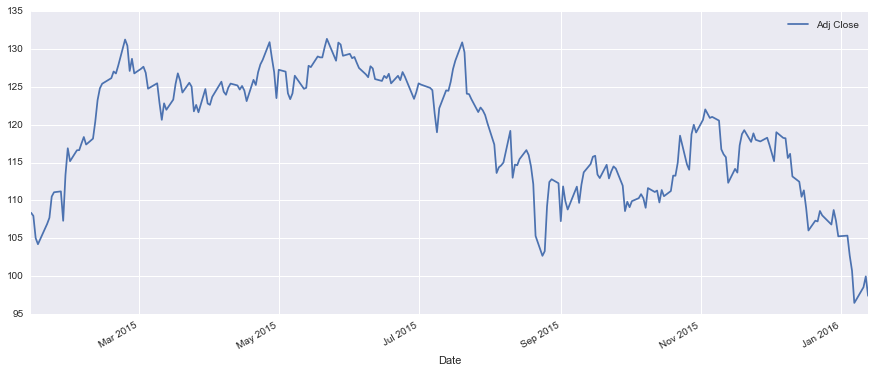

In [16]:
AAPL['Adj Close'].plot(legend=True,figsize=(15,6))

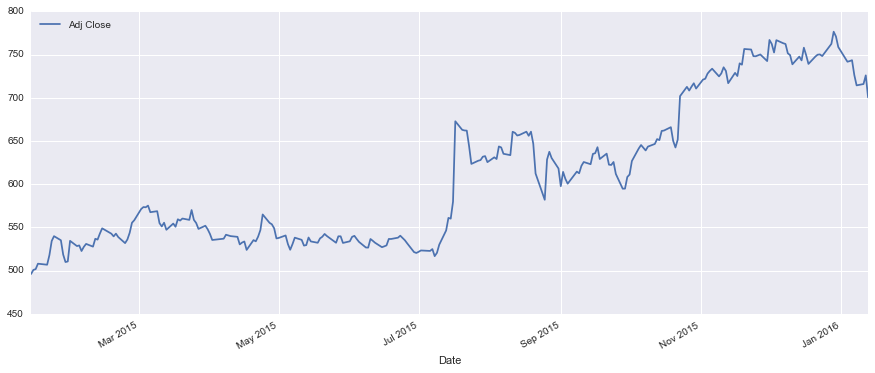

In [17]:
GOOG['Adj Close'].plot(legend=True,figsize=(15,6))

In [18]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-13,498.842256,502.982302,492.392254,496.182251,2370500,496.182251
2015-01-14,494.652237,503.232286,493.002234,500.872267,2235700,500.872267
2015-01-15,505.572291,505.682273,497.762267,501.792271,2715800,501.792271
2015-01-16,500.012273,508.192300,500.002267,508.082288,2298300,508.082288
2015-01-20,511.002313,512.502307,506.018277,506.902294,2227900,506.902294


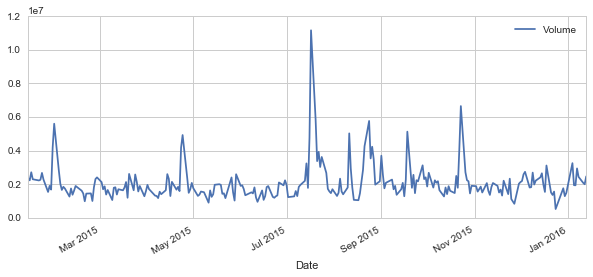

In [21]:
GOOG['Volume'].plot(legend=True, figsize=(10,4))

In [9]:
# creating moving averages

ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

In [13]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2015-01-20,107.839996,108.970001,106.500000,108.720001,49899900,106.898626,NaN,NaN,NaN
2015-01-21,108.949997,111.059998,108.269997,109.550003,48575900,107.714723,NaN,NaN,NaN
2015-01-22,110.260002,112.470001,109.720001,112.400002,53796400,110.516976,NaN,NaN,NaN
2015-01-23,112.300003,113.750000,111.529999,112.980003,46464800,111.087261,NaN,NaN,NaN
2015-01-26,113.739998,114.360001,112.800003,113.099998,55615000,111.205246,NaN,NaN,NaN


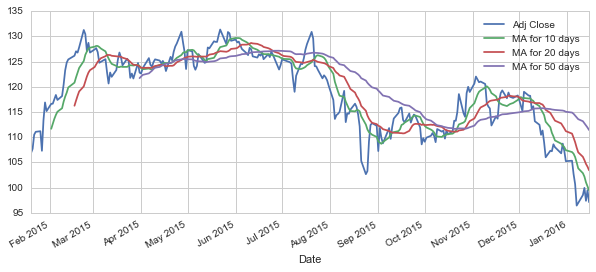

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize = (10,4))

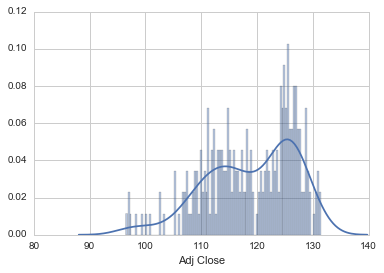

In [23]:
sns.distplot(AAPL['Adj Close'].dropna(),bins=100)

#AAPL['Adj Close'].hist()

In [25]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
tech_returns = closing_df.pct_change()

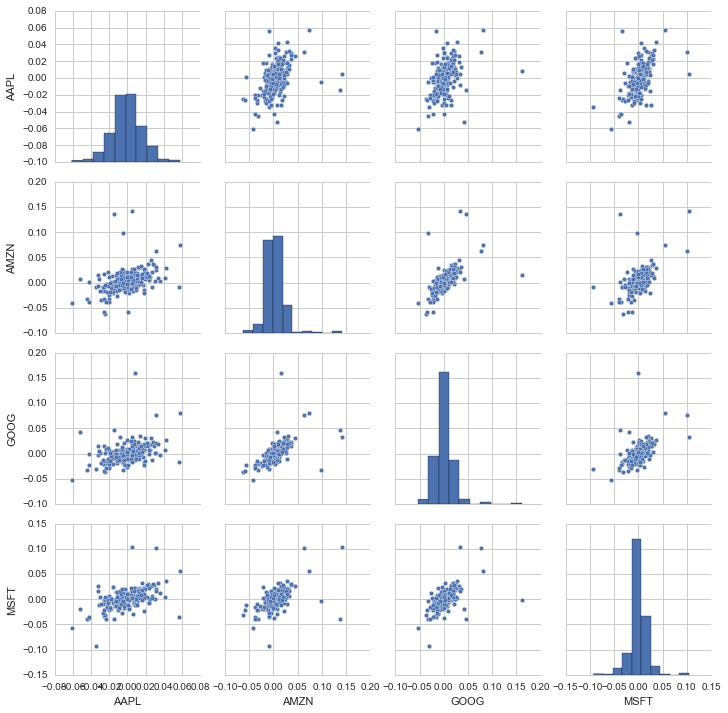

In [29]:
sns.pairplot(tech_returns.dropna())

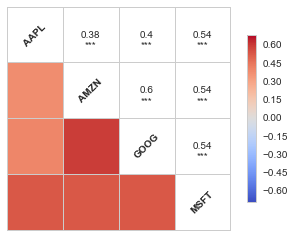

In [28]:
sns.corrplot(tech_returns.dropna())

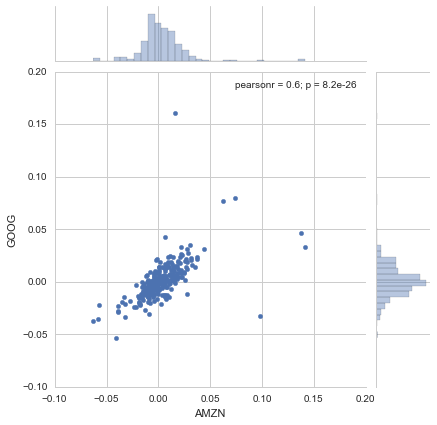

In [32]:
sns.jointplot('AMZN','GOOG',tech_returns)

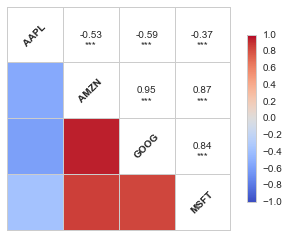

In [34]:
sns.corrplot(closing_df,annot=True)

In [36]:
np.pi*20

62.83185307179586

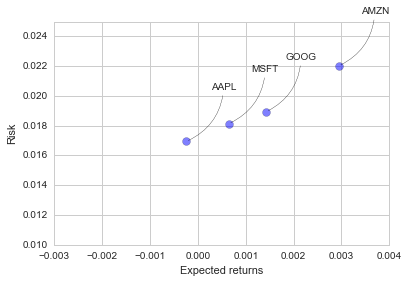

In [37]:
# Risk Analysis

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [39]:
tech_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-20,NaN,NaN,NaN,NaN
2015-01-21,0.007634,0.026983,0.021977,-0.010132
2015-01-22,0.026016,0.043970,0.031561,0.026350
2015-01-23,0.005160,0.006671,0.010404,0.001061
2015-01-26,0.001062,-0.008739,-0.008779,-0.003603


In [42]:
tech_returns.quantile(0.05)

AAPL   -0.026645
AMZN   -0.022782
GOOG   -0.022295
MSFT   -0.025543
dtype: float64

In [44]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])